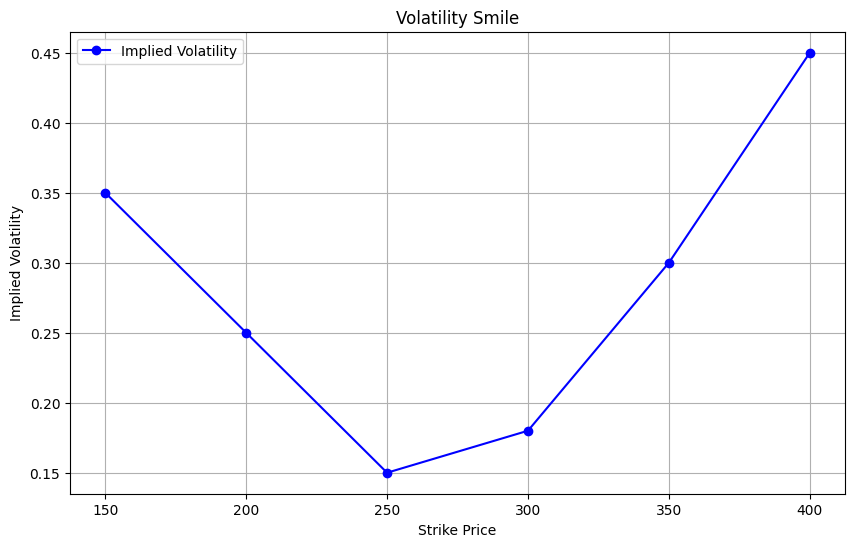

In [2]:
import scipy.stats as si
import numpy as np
import matplotlib.pyplot as plt

# Black-Scholes formula for European call option price
def black_scholes_call(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    call_price = S * si.norm.cdf(d1) - K * np.exp(-r * T) * si.norm.cdf(d2)
    return call_price

# Vega of the call option (derivative of price with respect to volatility)
def vega(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    return S * si.norm.pdf(d1) * np.sqrt(T)

# Newton-Raphson method to compute implied volatility
def implied_volatility_newton(S, K, T, r, market_price, tol=1e-8, max_iter=100):
    sigma = 0.2  # Initial guess for volatility
    for i in range(max_iter):
        price = black_scholes_call(S, K, T, r, sigma)
        vega_value = vega(S, K, T, r, sigma)

        # Safeguard against division by zero or very small vega values
        if vega_value < 1e-8:
            vega_value = 1e-8

        price_diff = price - market_price

        # Check for convergence
        if abs(price_diff) < tol:
            return sigma

        # Update sigma
        sigma -= price_diff / vega_value

        # Ensure sigma stays within reasonable bounds
        if sigma < 0:
            sigma = 0.01  # Minimum volatility constraint to avoid division by zero

    raise ValueError("Newton-Raphson method did not converge within the maximum iterations")

# Parameters for the plot
S = 250  # Current stock price
T = 1    # Time to maturity (1 year)
r = 0.05  # Risk-free interest rate (5%)
strikes = np.arange(100, 450, 50)  # Range of strike prices


# Generate hypothetical market prices with more extreme variations to replicate the original smile
true_volatilities = [0.5, 0.35, 0.25, 0.15, 0.18, 0.3, 0.45]  # Increased variations for a more pronounced smile
market_prices = [black_scholes_call(S, K, T, r, sigma) for K, sigma in zip(strikes, true_volatilities)]

# Calculate implied volatilities for different strike prices
implied_vols = []
for K, market_price in zip(strikes, market_prices):
    try:
        iv = implied_volatility_newton(S, K, T, r, market_price)
        implied_vols.append(iv)
    except ValueError:
        implied_vols.append(np.nan)  # Append NaN if convergence fails

# Plotting the volatility smile
plt.figure(figsize=(10, 6))
plt.plot(strikes, implied_vols, marker='o', linestyle='-', color='b', label='Implied Volatility')
plt.xlabel('Strike Price')
plt.ylabel('Implied Volatility')
plt.title('Volatility Smile')
plt.grid(True)
plt.legend()
plt.show()
